In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle

In [2]:
boston = datasets.load_boston()

In [3]:
features = pd.DataFrame(boston.data,columns=boston.feature_names)
price = boston.target


In [4]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
price

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Exploratory data analysis

In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


There are no missing values in Independent variables.

In [7]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
minimum_price= np.min(price)
maximum_price =np.max(price)
mean_price = np.mean(price)
median_price = np.median(price)
std = np.std(price)


In [9]:
print("Minimum Price is: $",round(minimum_price*1000,2))
print("Maximum Price is: $",round(maximum_price*1000,2))
print("Mean is: $",round(mean_price*1000,2))
print("Median is: $",round(median_price*1000,2))
print("Standard Deviation is:", std)

Minimum Price is: $ 5000.0
Maximum Price is: $ 50000.0
Mean is: $ 22532.81
Median is: $ 21200.0
Standard Deviation is: 9.188011545278203


## Data Visualization

/home/sanket/anaconda3/envs/snehu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

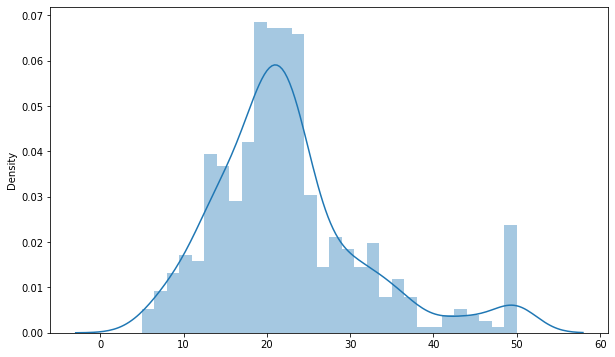

In [10]:
plt.figure(figsize=(10, 6))
sns.distplot(price,bins=30)

## Splitting data into training and testing set

In [11]:
price=price.reshape(-1,1)
sc= StandardScaler()     # we care scaling the data first
scaled_features=sc.fit_transform(features)
scaled_price = sc.fit_transform(price)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=10)

In [13]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

<ipython-input-13-5538211bde8b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestRegressor()

In [14]:
y_pred = model.predict(x_test)

In [15]:
y_pred

array([24.595, 29.628, 25.69 , 28.859, 18.765, 15.944, 44.232, 15.253,
       20.582, 46.77 , 19.869, 25.786, 24.298, 33.175, 32.187, 44.508,
       24.554, 20.892, 21.138, 17.326, 33.135, 15.531, 21.509, 24.083,
       36.412, 19.304, 18.557, 15.956, 44.733, 14.492, 31.89 , 31.541,
       24.369, 24.747, 15.933, 20.069,  8.885, 35.012, 23.455, 22.727,
       42.381, 24.647, 11.097, 29.504, 19.754, 27.771, 20.537, 20.195,
       48.061, 17.171, 20.409, 13.998, 21.014, 44.924, 27.246, 32.806,
       19.804, 20.839, 20.71 , 30.37 , 19.833, 21.154, 46.41 , 44.359,
       25.16 , 15.425, 23.252,  9.164, 27.802, 39.75 , 16.602, 27.295,
       18.854, 39.092, 24.704, 17.178, 41.621,  8.907, 19.341, 30.733,
       20.217, 23.775, 19.122, 24.533, 30.616, 29.796, 24.26 , 32.205,
       25.69 ,  8.365, 25.397, 19.29 , 23.042, 24.085, 19.448, 18.433,
       25.317, 21.021, 20.434, 20.289, 22.151, 19.52 ])

In [16]:
r2_score = metrics.r2_score(y_test,y_pred)

In [17]:
r2_score

0.8568578325375195

In [20]:
pickle.dump(model,open('random_reg.model','wb'))